## Model Building & Evaluation Notebook for Random Forest Classifier Approach to Dimensionality Reduction

In [1]:
# Import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
# Import data from previous notebook

X_train = pd.read_csv('Mod_3_X_train_Tree.csv')
X_test = pd.read_csv('Mod_3_X_test_Tree.csv')
Y_train = pd.read_csv('Mod_3_Y_train.csv')
Y_test = pd.read_csv('Mod_3_Y_test.csv')

In [3]:
print('Y_train Information\n')
Y_train.info()
print('\n\nY_test Information\n')
Y_test.info()

Y_train Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126204 entries, 0 to 126203
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   readmitted  126204 non-null  object
dtypes: object(1)
memory usage: 986.1+ KB


Y_test Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19869 entries, 0 to 19868
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   readmitted  19869 non-null  object
dtypes: object(1)
memory usage: 155.4+ KB


In [4]:
# Change Y data to categorical
Y_train = Y_train.astype('category')
Y_test = Y_test.astype('category')

In [5]:
# Verify changes were made correctly
print('Y_train Information\n')
Y_train.info()
print('\n\nY_test Information\n')
Y_test.info()

Y_train Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126204 entries, 0 to 126203
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   readmitted  126204 non-null  category
dtypes: category(1)
memory usage: 123.5 KB


Y_test Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19869 entries, 0 to 19868
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   readmitted  19869 non-null  category
dtypes: category(1)
memory usage: 19.7 KB


## Model 1 - KNN

In [6]:
# Instantiate the K-Nearest Neighbors classifier with 5 neighbors
KNN = KNeighborsClassifier(n_neighbors = 5)

# Using the KNN classifier on the training data
KNN.fit(X_train, Y_train)

C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [7]:
# Use the KNN classifier to make predictions
# Start timer
start_time = time.time()

# Making predictions using KNN classifier
Y_predict_KNN = KNN.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 39.226614475250244 seconds


In [8]:
# Printing actuals and predictions
#print('Actuals:\t\t', list(Y_test))
#print('Predictions with KNN model: \t\t', list(Y_predict_KNN))

## KNN Confusion Matrix and Model Evaluation

In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_KNN)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[1061  569  536]
 [3531 1869 1844]
 [4470 2522 3467]]


In [10]:
print(Y_train.value_counts())
print(Y_test.value_counts())

readmitted
<30           42068
>30           42068
NO            42068
Name: count, dtype: int64
readmitted
NO            10459
>30            7244
<30            2166
Name: count, dtype: int64


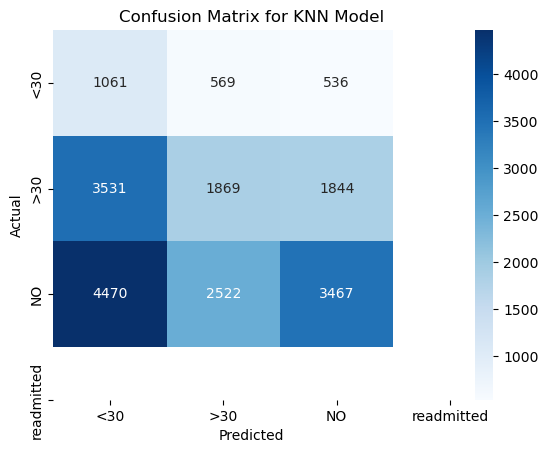

In [11]:
# Define classes


classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_KNN]



# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_KNN)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [12]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_KNN, average = 'weighted')
recall = recall_score(Y_test, Y_predict_KNN, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_KNN)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.4623
Recall: 0.3220
Accuracy: 0.3220


In [13]:
print(classification_report(Y_test, Y_predict_KNN, target_names=['<30', '>30', 'NO']))

              precision    recall  f1-score   support

         <30       0.12      0.49      0.19      2166
         >30       0.38      0.26      0.31      7244
          NO       0.59      0.33      0.43     10459

    accuracy                           0.32     19869
   macro avg       0.36      0.36      0.31     19869
weighted avg       0.46      0.32      0.36     19869



## Model 2 - Decision Tree

In [14]:
# Instantiate the decision tree classifier
DecisionTree = DecisionTreeClassifier(random_state = 403)

# Train the model
DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=403)

In [15]:
# Use the decision tree classifier to make predictions

# Start timer
start_time = time.time()

# Making predictions using decision tree classifier
Y_predict_tree = DecisionTree.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.004089832305908203 seconds


## Decision Tree Confusion Matrix and Model Evaluation

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_tree)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[1261  901    4]
 [3889 3336   19]
 [4989 5459   11]]


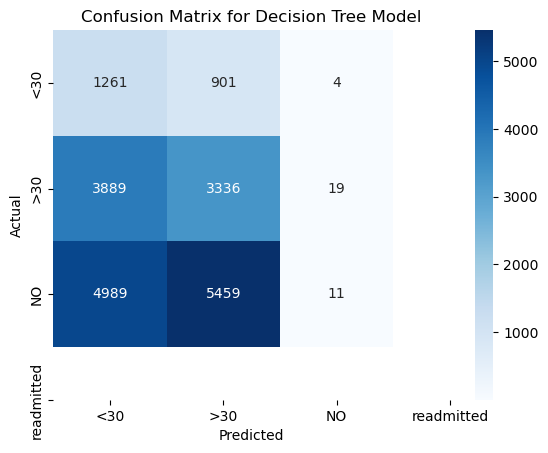

In [17]:
# Define classes

classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_tree]



# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_tree)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [18]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_tree, average = 'weighted')
recall = recall_score(Y_test, Y_predict_tree, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_tree)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.3093
Recall: 0.2319
Accuracy: 0.2319


In [19]:
# Plot the decision tree
'''
plt.figure(figsize=(12,8))
plot_tree(DecisionTree, filled = True, feature_names=X_train.columns, class_names = DecisionTree.classes_)
plt.title("Decision Tree Visualization")
plt.show()
'''

'\nplt.figure(figsize=(12,8))\nplot_tree(DecisionTree, filled = True, feature_names=X_train.columns, class_names = DecisionTree.classes_)\nplt.title("Decision Tree Visualization")\nplt.show()\n'

In [20]:
print(classification_report(Y_test, Y_predict_tree, target_names=['<30', '>30', 'NO']))

              precision    recall  f1-score   support

         <30       0.12      0.58      0.20      2166
         >30       0.34      0.46      0.39      7244
          NO       0.32      0.00      0.00     10459

    accuracy                           0.23     19869
   macro avg       0.26      0.35      0.20     19869
weighted avg       0.31      0.23      0.17     19869



## Model 3 - Random Forest Classifier

In [21]:
# Instantiate the random forest classifier
RandomForest = RandomForestClassifier(n_estimators = 100, random_state = 403)

# Start timer
start_time = time.time()

# Train the model
RandomForest.fit(X_train, Y_train)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Time taken: 26.33955478668213 seconds


In [22]:
# Use the random forest classifier to make predictions

# Start timer
start_time = time.time()

# Making predictions using random forest classifier
Y_predict_RF = RandomForest.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.1551358699798584 seconds


## Random Forest Confusion Matrix and Model Evaluation

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_RF)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[1090 1076    0]
 [3145 4099    0]
 [4655 5804    0]]


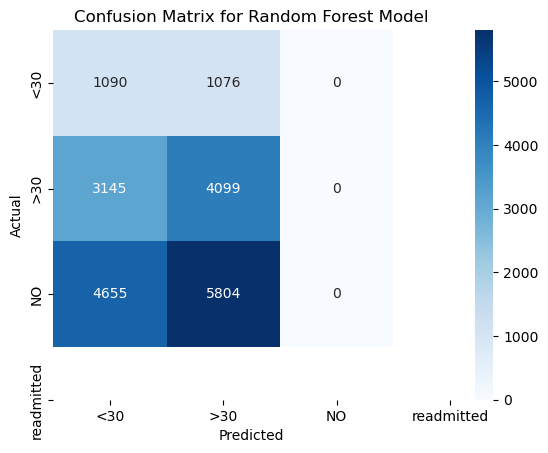

In [24]:
# Define classes

classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_RF]



# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_RF)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [25]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_RF, average = 'weighted')
recall = recall_score(Y_test, Y_predict_RF, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_RF)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.1495
Recall: 0.2612
Accuracy: 0.2612


C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(classification_report(Y_test, Y_predict_RF, target_names=['<30', '>30', 'NO']))

C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         <30       0.12      0.50      0.20      2166
         >30       0.37      0.57      0.45      7244
          NO       0.00      0.00      0.00     10459

    accuracy                           0.26     19869
   macro avg       0.17      0.36      0.22     19869
weighted avg       0.15      0.26      0.19     19869



C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 4 - Naive Bayes

In [27]:
# Instantiate the Naive Bayes classifier
NB = GaussianNB()

# Start timer
start_time = time.time()

# Train the model
NB.fit(X_train, Y_train)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.1635303497314453 seconds


C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# Use the random forest classifier to make predictions

# Start timer
start_time = time.time()

# Making predictions using random forest classifier
Y_predict_NB = NB.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.016966819763183594 seconds


## Naive Bayes Confusion Matrix and Model Evaluation

In [29]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_NB)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[    9     8  2149]
 [    7     7  7230]
 [    4     4 10451]]


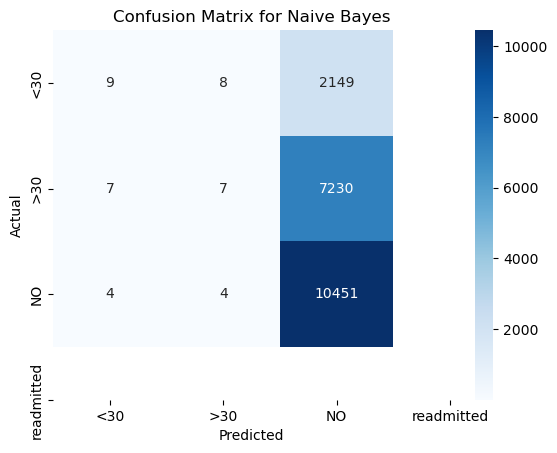

In [30]:
# Define classes

classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_NB]



# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_NB)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [31]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_NB, average = 'weighted')
recall = recall_score(Y_test, Y_predict_NB, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_NB)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.4608
Recall: 0.5268
Accuracy: 0.5268


In [32]:
print(classification_report(Y_test, Y_predict_NB, target_names=['<30', '>30', 'NO']))

              precision    recall  f1-score   support

         <30       0.45      0.00      0.01      2166
         >30       0.37      0.00      0.00      7244
          NO       0.53      1.00      0.69     10459

    accuracy                           0.53     19869
   macro avg       0.45      0.33      0.23     19869
weighted avg       0.46      0.53      0.36     19869

